## Introduction

The goal of this project is to analyze the biodiversity data from the National Park Service, particulary around various species observed in different national park locations. 

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis. 

Here are the questions this project intends to answer: 

    + Which animal type or species is most in danger?
    + Are there differences between species and their conservation status?
    + What is the distrubition of conservation status for each species?
    + Which animals are thriving and what is their distrubition amongst the parks?

*Data Sources*

Both "observations.csv" and "species_info.csv" was provided by Codeacademy.com. 

Note: The data for this project is inspired by real data, but is mainly fictional. 

## Scope





In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

folder_path = r"C:\Users\Yolo's Finest\OneDrive\Desktop\sqlite-tools-win-x64-3470000"
file_pattern = os.path.join(folder_path, '*.csv')
files = glob.glob(file_pattern)
specific_files = ["observations.csv", "species_info.csv"]
df_list = [csv for csv in files if os.path.basename(csv) in specific_files]   

df = pd.concat((pd.read_csv(f) for f in df_list), ignore_index=True)

#Merging both files under scientific_name
merged_df = pd.merge(observations, species, on='scientific_name')





**Import Tools**
1. First step was opening the appropriate files for the project. I used os library to assist and using the correct file path. 
2. Using glob to combine the two csv files into one dataframe we can manipulate later. 
3. Filtered it to search for only the "csv" files needed. 
4. Pandas for the concat feature and merge filter. Both compacted dataframes will serve a later purpose in exploring. 

**Column Names**

Scientific Name: Name of the species

Park Name: Where the species is observed

Observations: Frequency of data collected 

Category: Sub species(Mammal, Amphibian, Fish, Bird, etc.)

Common Names: Well known name for species. 

Conservation Status: Level of endangerment. 

**Species**

In [86]:
print(species.head())
print(species.groupby('category').size())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64


**Observations**

In [87]:
print(observations.head())
print(observations.groupby('park_name').size())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
park_name
Bryce National Park                    5824
Great Smoky Mountains National Park    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
dtype: int64


**Left Merge - Observations w/ Species on Scientific Names**

In [88]:
print(merged_df.head())
print(merged_df.dtypes)
print(merged_df.describe())

            scientific_name                            park_name  \
0        Vicia benghalensis  Great Smoky Mountains National Park   
1            Neovison vison  Great Smoky Mountains National Park   
2         Prunus subcordata               Yosemite National Park   
3      Abutilon theophrasti                  Bryce National Park   
4  Githopsis specularioides  Great Smoky Mountains National Park   

   observations        category                        common_names  \
0            68  Vascular Plant  Purple Vetch, Reddish Tufted Vetch   
1            77          Mammal                       American Mink   
2           138  Vascular Plant                        Klamath Plum   
3            84  Vascular Plant                          Velvetleaf   
4            85  Vascular Plant                      Common Bluecup   

  conservation_status  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
scientific_name     

*Grab some general stats about our data*
How many observations are there? How many unique species are there? How many different categories of animals?
There are multiple NaN in conservation status. 
We can call it "Safe". Then change the dtype for the column to category. 

In [89]:
#Number of observations
print(f'Number of total observations: {len(observations)}')

#Number of species
print(f' Number of total unique species by scientific names: {species['scientific_name'].nunique()}')

#Number of categories
print(merged_df['category'].unique())
merged_df['conservation_status'] = merged_df['conservation_status'].astype('category')

#Left Merge Species to Observations on Scienctific Names
sp_merge = pd.merge(species, observations, on='scientific_name')
print(sp_merge['conservation_status'].unique())
print(f"Number of NaN values in Conservation_Status: {sp_merge['conservation_status'].isnull().sum()}")
print(sp_merge['conservation_status'].value_counts())

Number of total observations: 23296
 Number of total unique species by scientific names: 5541
['Vascular Plant' 'Mammal' 'Bird' 'Nonvascular Plant' 'Amphibian'
 'Reptile' 'Fish']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
Number of NaN values in Conservation_Status: 24752
conservation_status
Species of Concern    732
Endangered             80
Threatened             44
In Recovery            24
Name: count, dtype: int64


Out of 23,296 observations there are 5,541 unique creatures observed. They all range from being a vascular plant, mammal, bird, nonvascular plant, amphibian, reptile, or fish. They can be classified as "Safe"(NaN), endangered, threatened, recovery, or a species of concern. Only 880 observations were made with species that fall into the 4 conservation statuses. That's roughly 3.8% of this sample population that are of concern of being extinct or greater. 

In [90]:
#Testing what information is pulled for a specific observation.

example_observation = observations[observations.scientific_name == 'Grus americana']
print(example_observation)

      scientific_name                            park_name  observations
9753   Grus americana  Great Smoky Mountains National Park            13
10848  Grus americana            Yellowstone National Park            57
13745  Grus americana                  Bryce National Park            24
20342  Grus americana               Yosemite National Park            37


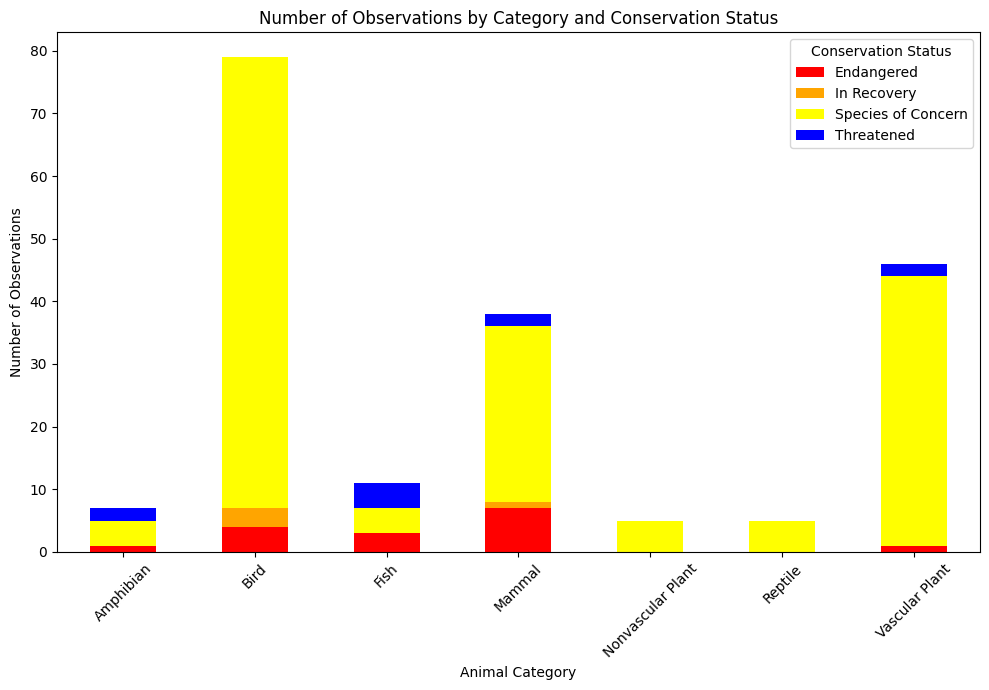

In [91]:

# Step 1: Group by 'category' and 'conservation_status' and count occurrences
filtered_df = df[df['conservation_status'].isin(['Endangered', 'In Recovery', 'Threatened', 'Species of Concern'])]

grouped_data = filtered_df.groupby(['category', 'conservation_status']).size().unstack(fill_value=0)
# Step 2: Plot the data as a stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 7), color=['red', 'orange', 'yellow', 'blue'])

# Step 3: Customize the plot
ax.set_title('Number of Observations by Category and Conservation Status')
ax.set_xlabel('Animal Category')
ax.set_ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Conservation Status')
plt.tight_layout()

# Show the plot
plt.show()


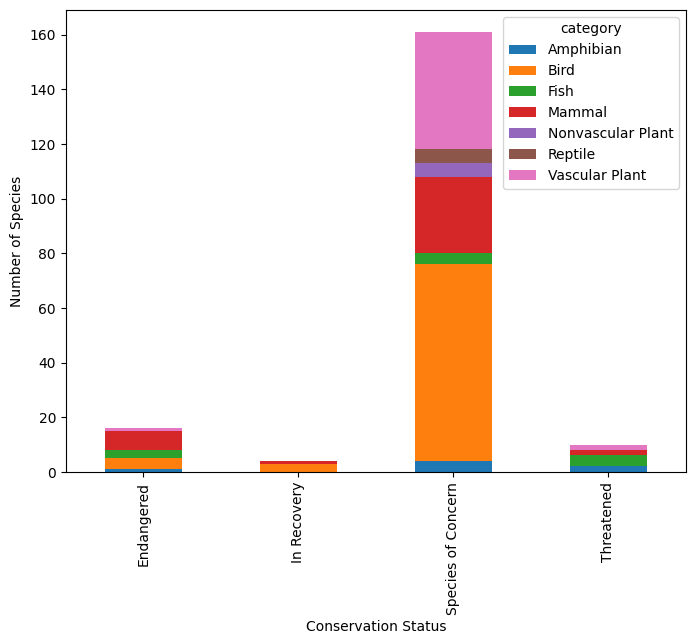

In [92]:
#Chart for conservation statuses counted by their unique species name displayed through their categories. 

ccs_filter = species[species.conservation_status != "NaN"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

new_ax = ccs_filter.plot(kind = 'bar', figsize=(8,6), stacked=True)
new_ax.set_xlabel("Conservation Status")
new_ax.set_ylabel("Number of Species")
plt.show()

Mammals are most likely to be endangered while birds have the most recovery. What stands out most is birds, mammalsm and vascular plants all have high observations of species of concern. Perhaps they haven't been assigned an official category of threatened or safe.  

Counts for Observations per Park

In [93]:
#Multiple Parks were recorded "Safe". Replacing them with "Unknown"

misplaced_entries = df[df['park_name'] == 'Safe']
print(misplaced_entries)

df.loc[df['park_name'] == 'Safe', 'conservation_status'] = 'Safe'
df.loc[df['park_name'] == 'Safe', 'park_name'] = pd.NA

#Fill in with Unknown
df['park_name'].fillna('Unknown', inplace=True)
print(df['conservation_status'].value_counts())

Empty DataFrame
Columns: [scientific_name, park_name, observations, category, common_names, conservation_status]
Index: []
conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


C:\Users\Yolo's Finest\AppData\Local\Temp\ipykernel_44420\2310022552.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['park_name'].fillna('Unknown', inplace=True)


*Check for park name change*

In [94]:
print(observations['park_name'].unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


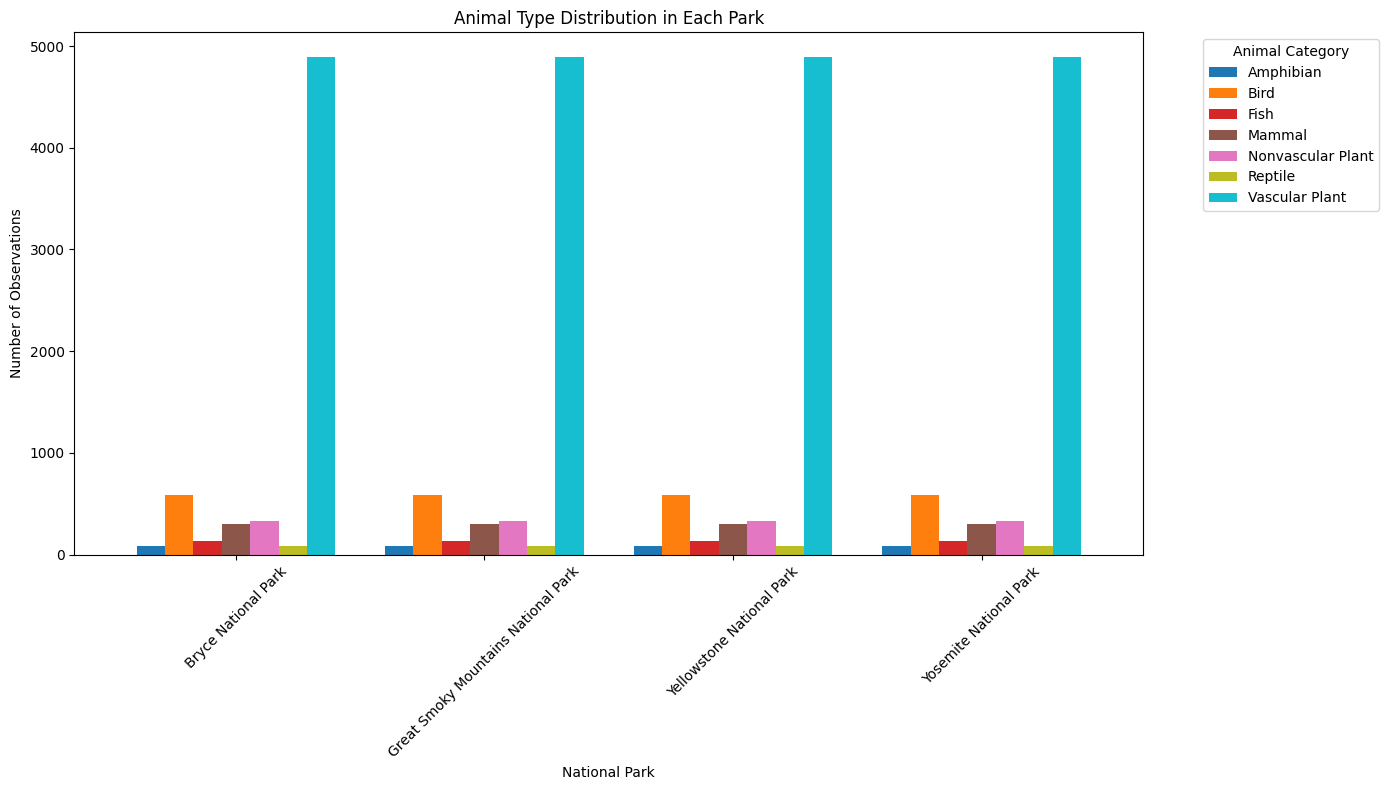

In [95]:
#Filter for Animal Distribution (Move to further out cell)
animal_distribution = sp_merge.groupby(['park_name', 'category']).size().unstack(fill_value=0)

# Step 2: Plot the data as a grouped bar chart
ax = animal_distribution.plot(kind='bar', figsize=(14, 8), colormap='tab10', width=0.8)

# Step 3: Customize the plot
ax.set_title('Animal Type Distribution in Each Park')
ax.set_xlabel('National Park')
ax.set_ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.legend(title='Animal Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


It seems each National Park has the exact counts for each animal type. They do have the same number of observations. Is it truly possible to have the same animal sightings at 4 different national parks all in spready out regions?

**In Conservation**

Are there differences between species and their conservation statuses? Let's explore. 

In [132]:
species['is_safe'] = species['conservation_status'] != 'No Intervention'
species['not_safe'] = species['conservation_status'].isin(['Species of Concern', 'Endangered', 'Threatened', 'In Recovery'])

# Group by 'category' and both 'is_safe' and 'not_safe' columns to get counts
category_counts_safe = species.groupby(['category', 'is_safe']).scientific_name.nunique().reset_index()
category_counts_not_safe = species.groupby(['category', 'not_safe']).scientific_name.nunique().reset_index()

# Pivot tables to separate 'True' and 'False' for 'is_safe'
category_counts_safe_pivot = species.groupby(['category', 'is_safe'])\
                                    .scientific_name.nunique()\
                                    .reset_index()\
                                    .pivot_table(columns='is_safe', 
                                                 index='category', 
                                                 values='scientific_name', 
                                                 aggfunc='sum')\
                                    .fillna(0)\
                                    .reset_index()

# Pivot tables to separate 'True' and 'False' for 'not_safe'
category_counts_not_safe_pivot = species.groupby(['category', 'not_safe'])\
                                        .scientific_name.nunique()\
                                        .reset_index()\
                                        .pivot_table(columns='not_safe', 
                                                     index='category', 
                                                     values='scientific_name', 
                                                     aggfunc='sum')\
                                        .fillna(0)\
                                        .reset_index()

# Determine the columns present in the pivoted DataFrames
safe_columns = ['category', 'total']
not_safe_columns = ['category', 'not_safe', 'safe']

# Rename the columns accordingly
category_counts_safe_pivot.columns = safe_columns
category_counts_not_safe_pivot.columns = not_safe_columns

# Merge the two pivot tables on 'category'
final_category_counts = pd.merge(category_counts_safe_pivot, 
                                 category_counts_not_safe_pivot, 
                                 on='category', 
                                 how='outer').fillna(0)

# Print the final table
print(final_category_counts)



            category  total  not_safe  safe
0          Amphibian     79        72     7
1               Bird    488       413    75
2               Fish    125       115    11
3             Mammal    176       146    30
4  Nonvascular Plant    333       328     5
5            Reptile     78        73     5
6     Vascular Plant   4262      4216    46


Here we can see why the birds have the highest recovery stats in this data sample. Vascular plants are high as it is to be assumed they were seen in large quantities when compared to the other animals. Next in line was birds that are under watch were high in the 'not_safe' category. 

# Statistical Significance

This section will run a couple chi-squared tests to see if different species have statistically significant differences in conservation status rates. A contingency table will need to be created. Two test will be ran for the standard p-value of 0.05 for statistical significance. One test for vascular plants vs reptiles and birds vs nonvascular plants. 

In [134]:
from scipy.stats import chi2_contingency

contingency1 = [[46,4216], [5, 73]]
contingency2 = [[75, 413], [5, 328]]


print(chi2_contingency(contingency1))
print(chi2_contingency(contingency2))


Chi2ContingencyResult(statistic=np.float64(14.435371140033908), pvalue=np.float64(0.00014505215494675828), dof=1, expected_freq=array([[5.00834101e+01, 4.21191659e+03],
       [9.16589862e-01, 7.70834101e+01]]))
Chi2ContingencyResult(statistic=np.float64(41.717457869992714), pvalue=np.float64(1.0546306904975004e-10), dof=1, expected_freq=array([[ 47.55176614, 440.44823386],
       [ 32.44823386, 300.55176614]]))
Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


*Interpretation*

Both test shown significant differences in both animal comparisons. Reptiles may rely on certain vascular plants as food sources. If more food is becoming extinct, so will the associated reptile that feeds on it. In the second test for birds over nonvascular plants applies the same logic. They are heavily reliant of each other. 

**Amphibian's deeper look**

Amphabians was the lowest observed creature type across all 4 parks. Lets find out the most sighted one, from which park, and gauge how well they are doing in conservation.

In [137]:
from itertools import chain
import string

# Function to remove punctuation marks from text
def remove_marks(text):
    for marks in string.punctuation:
        text = text.replace(marks, '')  # Remove each punctuation mark
    return text

# Apply the function to remove punctuation in the 'common_names' column for 'Amphibian' category
common_Names = species[species.category == 'Amphibian'].common_names.apply(remove_marks).str.split().tolist()

# Display the first 6 cleaned common names
common_Names[:6]


[['Eastern', 'American', 'Toad'],
 ['Fowlers', 'Toad', 'Woodhouses', 'Toad'],
 ['Northern', 'Cricket', 'Frog'],
 ['Copes', 'Gray', 'Treefrog'],
 ['Gray', 'Treefrog'],
 ['Mountain', 'Chorus', 'Frog']]

Clean up the list to even more common names to further breakdown. 

In [139]:
cleanSet = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanSet.append(item)

#Display Clean set
cleanSet[:6]

[['Eastern', 'American', 'Toad'],
 ['Fowlers', 'Toad', 'Woodhouses'],
 ['Northern', 'Cricket', 'Frog'],
 ['Copes', 'Gray', 'Treefrog'],
 ['Gray', 'Treefrog'],
 ['Mountain', 'Chorus', 'Frog']]

In [140]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanSet))
res[:6]

['Eastern', 'American', 'Toad', 'Fowlers', 'Toad', 'Woodhouses']

In [142]:
name_counted = []

for i in res:
    x = res.count(i)
    name_counted.append((i,x))

pd.DataFrame(set(name_counted), columns=['Word', 'Count']).sort_values("Count", ascending=False).head(10)

,Word,Count
76,Salamander,41
31,Frog,14
44,Northern,8
78,Toad,7
91,Eastern,7
34,Southern,6
17,Chorus,5
10,Red,4
35,Mud,4
40,American,3


Now go back to the species data and filter out the Salamanders. 

In [143]:
species['is_salamander'] = species.common_names.str.contains(r"\bSalamander\b", regex=True)

species.head(10)

,category,scientific_name,common_names,conservation_status,is_safe,not_safe,is_salamander
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,True,False,False
1,Mammal,Bos bison,"American Bison, Bison",NaN,True,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN,True,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN,True,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN,True,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN,True,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN,True,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,True,False


In [144]:
species[species.is_salamander].head(10)

,category,scientific_name,common_names,conservation_status,is_safe,not_safe,is_salamander
428,Amphibian,Ambystoma maculatum,Spotted Salamander,NaN,True,False,True
429,Amphibian,Ambystoma opacum,Marbled Salamander,NaN,True,False,True
430,Amphibian,Ambystoma talpoideum,Mole Salamander,NaN,True,False,True
432,Amphibian,Desmognathus conanti,Spotted Dusky Salamander,NaN,True,False,True
433,Amphibian,Desmognathus imitator,Imitator Salamander,NaN,True,False,True
434,Amphibian,Desmognathus marmoratus,Shovel-Nosed Salamander,NaN,True,False,True
435,Amphibian,Desmognathus monticola,Seal Salamander,NaN,True,False,True
436,Amphibian,Desmognathus ocoee,Ocoee Salamander,NaN,True,False,True
437,Amphibian,Desmognathus quadramaculatus,Black-Bellied Salamander,NaN,True,False,True
438,Amphibian,Desmognathus santeetlah,"Santeetlah Dusky Salamander, Santleetlah Dusky...",NaN,True,False,True


In [145]:
salamanders_observed = observations.merge(species[species.is_salamander])
salamanders_observed

,scientific_name,park_name,observations,category,common_names,conservation_status,is_safe,not_safe,is_salamander
0,Eurycea longicauda longicauda,Yosemite National Park,147,Amphibian,Longtail Salamander,NaN,True,False,True
1,Desmognathus wrighti,Yellowstone National Park,201,Amphibian,Pigmy Salamander,Species of Concern,True,True,True
2,Plethodon aureolus,Bryce National Park,90,Amphibian,Tellico Salamander,NaN,True,False,True
3,Plethodon metcalfi,Bryce National Park,131,Amphibian,Southern Gray-Cheeked Salamander,NaN,True,False,True
4,Ambystoma mavortium melanostictum,Bryce National Park,84,Amphibian,Blotched Tiger Salamander,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...
159,Ambystoma opacum,Bryce National Park,115,Amphibian,Marbled Salamander,NaN,True,False,True
160,Plethodon oconaluftee,Great Smoky Mountains National Park,68,Amphibian,Southern Appalachian Salamander,NaN,True,False,True
161,Pseudotriton ruber ruber,Bryce National Park,77,Amphibian,Northern Red Salamander,NaN,True,False,True
162,Pseudotriton ruber schencki,Great Smoky Mountains National Park,89,Amphibian,Blackchin Red Salamander,NaN,True,False,True


In [146]:
salamanders_observed.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3946
1,Great Smoky Mountains National Park,3023
2,Yellowstone National Park,10234
3,Yosemite National Park,6174


Parks broken down by safe salamanders and not safe salamanders. 

In [148]:
salamander_by_park = salamanders_observed.groupby(['park_name', 'not_safe']).observations.sum().reset_index()
salamander_by_park

,park_name,not_safe,observations
0,Bryce National Park,False,3723
1,Bryce National Park,True,223
2,Great Smoky Mountains National Park,False,2863
3,Great Smoky Mountains National Park,True,160
4,Yellowstone National Park,False,9844
5,Yellowstone National Park,True,390
6,Yosemite National Park,False,5885
7,Yosemite National Park,True,289


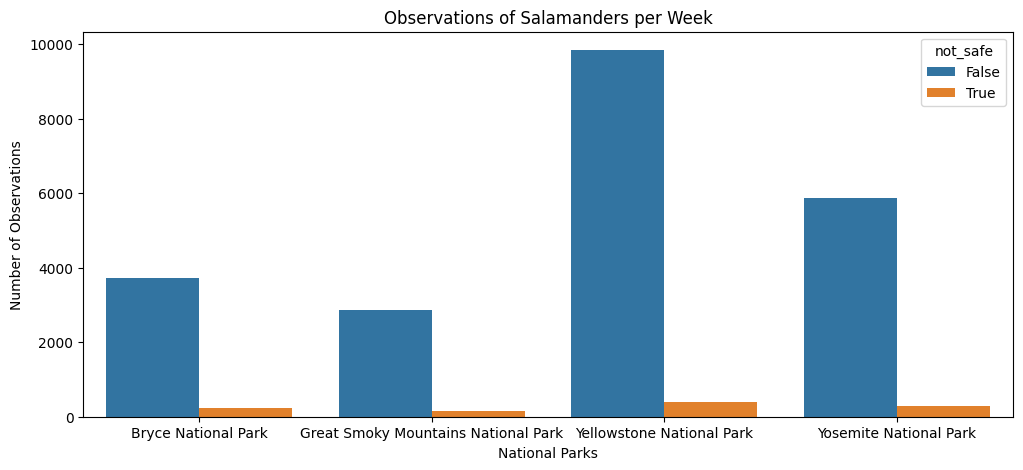

In [152]:
#Graph for above chart
plt.figure(figsize=(12, 5))
sns.barplot(x=salamander_by_park.park_name, y= salamander_by_park.observations, hue=salamander_by_park.not_safe)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Salamanders per Week')
plt.show()

From this view you can easily see Yellowstone having far more safe salamanders under their care than the rest. 

## Conclusion


This project was able to answer the answers from the introduction comprising various species over 4 national parks:

Here are the questions this project answered: 

    + Which animal type or species is most in danger? Mammals specifically bat types. 
    + Are there differences between species and their conservation status? As far as terms yes, but in statistics the contingency stats supported no major difference
    + What is the distrubition of conservation status for each species? Plenty of Amphbians need help. 
    + Which animals are thriving and what is their distrubition amongst the parks? Birds have by the best recovery efforts while sea life may be seeing massive declines. More information over time (more than 7 days) would futher support and debunk this assumption. 

## Further Research


This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status fro various species changes over time. Another piece that is missing is the Area of each park it can be assumed that Yellowstone National Park might be larger than the other parks which would mean that it would have more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 